# PI7 Deel 1 - Niema Mahmoudi & Silas Dannullis


#### Importeren van de dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# dataset laden
df = pd.read_csv('preprocessed_boston_housing.csv')
print(df.head())

       crim        zn     indus  chas       nox        rm       age       dis  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        rad       tax   ptratio         b     lstat      medv  
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


# Uitwerking van de verschillende methoden

## Multiple Linear Regression

Ridge Regression is een variant van Multiple Linear Regression waarbij een regularisatieparameter wordt toegevoegd aan de verliesfunctie om overfitting tegen te gaan.

### Stap 1: Train-Test split

In deze stap wordt de dataset verdeeld in een trainingsset en een testset. De features (onafhankelijke variabelen) worden gebruikt om het model te trainen, terwijl de target (afhankelijke variabele) wordt gebruikt om het model te evalueren.

- **Features**: Alle kolommen behalve `medv` worden als features gebruikt.
  - De `medv`-kolom wordt niet gebruikt als feature, omdat deze de target variabele is.
- **Target**: De `medv`-kolom wordt als de target variabele gebruikt.
- **Verdeling**: 80% van de data wordt gebruikt voor training en 20% voor testen.

### Stap 2: Hyperparameter Tuning

We passen `GridSearchCV` toe om de beste hyperparameters voor het Ridge Regression model te vinden. Dit helpt bij het verbeteren van de modelprestaties door de optimale waarde voor de regularisatieparameter (`alpha`) te bepalen.

- **Model**: Ridge Regression
- **Parameter Grid**: `{'alpha': [0.1, 1, 10, 100, 1000]}`
- **Cross-Validation**: 5-voudige cross-validatie wordt gebruikt om de beste hyperparameters te selecteren.

### Stap 3: Model Training

Het model wordt getraind met de beste hyperparameters die zijn gevonden tijdens de hyperparameter tuning. Hiervoor wordt de `Ridge` klasse van scikit-learn gebruikt.

- **Model**: Ridge Regression met de beste `alpha` waarde.
- **Trainingsset**: De getrainde features (`X_train`) en de target (`y_train`) worden gebruikt om het model te fitten.

### Stap 4: Voorspelling en Evaluatie

Het getrainde model wordt gebruikt om voorspellingen te doen op de testset. De prestaties van het model worden geëvalueerd met behulp van Mean Squared Error (MSE) en de R^2 score. Daarnaast wordt een voorbeeld predictie getoond om de werking van het model te illustreren.

- **Voorspellingen**: Het model maakt voorspellingen (`y_pred`) op basis van de testset (`X_test`).
- **Evaluatie**:
  - **Mean Squared Error (MSE)**: Gemiddelde kwadraat van de fouten tussen de voorspelde waarden en de werkelijke waarden. Een lagere MSE betekent een beter model.
  - **R^2 Score**: Verhouding van verklaarde variantie. Een waarde dichter bij 1 betekent een beter model.
- **Cross-Validation Scores**: 5-voudige cross-validatie wordt toegepast om robuuste prestatiemetingen te verkrijgen.
  - **R^2 scores** van cross-validatie
  - **Gemiddelde R^2 score** van cross-validatie

### Voorbeeld Predictie

Een willekeurige index uit de testset wordt geselecteerd. De feature-waarden voor deze index worden opgehaald en gebruikt om een voorspelling te maken. De werkelijke `medv` waarde en de voorspelde `medv` waarde worden vergeleken om de nauwkeurigheid van de voorspelling te illustreren.

- **Feature waarden**: De waarden van de features voor een willekeurige observatie uit de testset.
- **Werkelijke waarde**: De werkelijke `medv` waarde voor deze observatie.
- **Voorspelde waarde**: De voorspelde `medv` waarde voor deze observatie.



Beste hyperparameters: {'alpha': 10}
Mean Squared Error: 0.22120321447367702
R^2 Score: 0.5374860440446215
Cross-validation R^2 scores: [0.66512025 0.71442179 0.68727887 0.79264278 0.64256242]
Gemiddelde Cross-validation R^2 score: 0.7004052204837024

Voorbeeld predictie:
Feature waarden: crim      -0.146472
zn        -0.486830
indus      1.225397
chas       0.000000
nox        2.728079
rm        -1.928059
age        0.962943
dis       -1.108215
rad       -0.525142
tax       -0.033520
ptratio   -1.727007
b          0.379680
lstat      2.362602
Name: 231, dtype: float64
Werkelijke MEDV waarde: -0.8629651374570703
Voorspelde MEDV waarde: -1.7571137400721155


C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


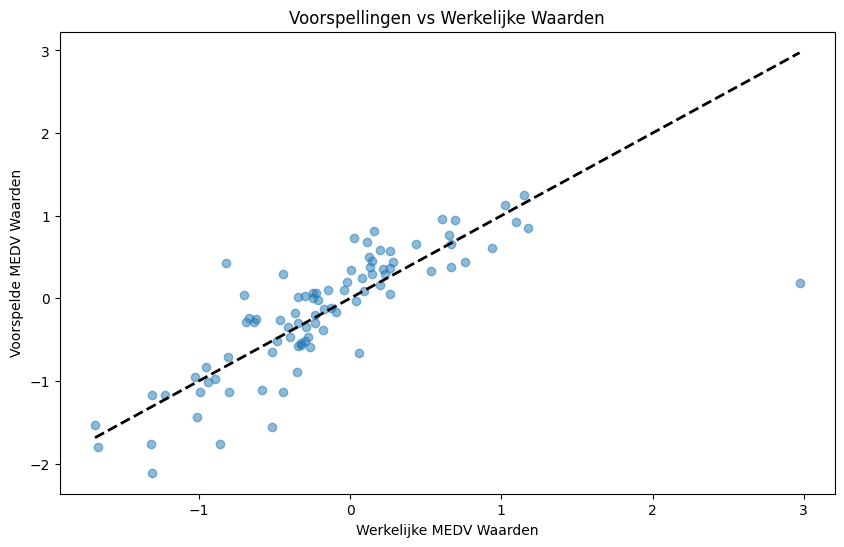

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test split
X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definieer het model en de parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Gebruik GridSearchCV om de beste hyperparameters te vinden
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Beste hyperparameters
print("Beste hyperparameters:", grid_search.best_params_)

# Train het model opnieuw met de beste hyperparameters
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)

# Voorspellingen maken
y_pred = best_ridge.predict(X_test)

# Evaluatie
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Cross-validation toepassen
cv_scores = cross_val_score(best_ridge, X, y, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Gemiddelde Cross-validation R^2 score:", cv_scores.mean())

# Voorbeeld predictie tonen
random_index = np.random.randint(0, len(X_test))
example_features = X_test.iloc[random_index]
example_actual_medv = y_test.iloc[random_index]
example_predicted_medv = best_ridge.predict([example_features])[0]

print("\nVoorbeeld predictie:")
print(f"Feature waarden: {example_features}")
print(f"Werkelijke MEDV waarde: {example_actual_medv}")
print(f"Voorspelde MEDV waarde: {example_predicted_medv}")

# Scatter plot van voorspellingen vs werkelijke waarden
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Werkelijke MEDV Waarden')
plt.ylabel('Voorspelde MEDV Waarden')
plt.title('Voorspellingen vs Werkelijke Waarden')
plt.show()



## Logistic Regression 

## Stappen

1. **Data Voorbereiding**:
   - De dataset wordt geladen en opgeschoond in het data selectie en preperatie blok. 
   - Voor logistic regression worden de features geselecteerd door de kolommen `Legendary`, `Name`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def` en `Speed` te verwijderen. Een aantal van deze kolommen zijn eruit gehaald omdat deze in de `Total` waarde terug komen. 
   - De target variabele is `Legendary`.

2. **Train-Test Split**:
   - De data wordt gesplitst in een trainingsset (60%) en een temporary set (40%).
   - De temporary set wordt vervolgens opgesplitst in een validatieset (50% van de temporary set) en een testset (50% van de temporary set).

3. **Model Training**:
   - Een Logistic Regression model wordt getraind op de trainingsset (`X_train` en `y_train`).

4. **Validatie**:
   - Voorspellingen worden gemaakt op de validatieset (`X_val`).
   - De nauwkeurigheid en het classificatierapport van de validatieset worden berekend en geprint.

5. **Evaluatie**:
   - Voorspellingen worden gemaakt op de testset (`X_test`).
   - De nauwkeurigheid en het classificatierapport van de testset worden berekend en geprint.

6. **Voorbeeld Predictie**:
   - Een willekeurige index wordt gekozen uit de testset.
   - De feature-waarden voor deze index worden opgehaald en een voorspelling wordt gemaakt.
   - De werkelijke en voorspelde `Legendary` waarde worden geprint.

Training set size: 265
Validation set size: 89
Test set size: 89
Validation Accuracy: 0.9101123595505618
Test Accuracy: 0.9101123595505618
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        81
           1       0.00      0.00      0.00         8

    accuracy                           0.91        89
   macro avg       0.46      0.50      0.48        89
weighted avg       0.83      0.91      0.87        89


Voorbeeld predictie:
Feature waarden: crim      -0.419397
zn         1.021051
indus     -1.403079
nox       -0.977510
rm         1.355329
age       -0.690386
dis        1.544914
rad       -0.984383
tax       -0.739276
ptratio   -1.357930
b          0.413297
lstat     -1.000561
Name: 210, dtype: float64
Werkelijke chas waarde: 0
Voorspelde chas waarde: 0


C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

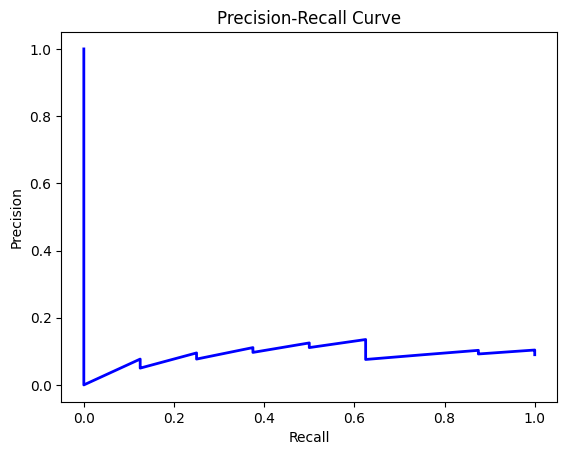

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve 



# kenmerken en target voor Logistic Regression
X = df.drop(columns=['chas', 'medv'])
y = df['chas']

# data splitsen in trainingsset en testset 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# resterende data in validatie- en testset splitsen
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# een logistic regression model op de trainingsset implementeren
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# voorspellingen maken op de validatieset 
y_val_pred = model.predict(X_val)

# evaluatie op de validatieset
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)

# voorspellingen maken op de testset
y_test_pred = model.predict(X_test)

# evaluatie op de testset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_class_report)

# willekeurige index uit de testset kiezen
random_index = np.random.randint(0, len(X_test))

# feature-waarden voor deze index ophalen
example_features = X_test.iloc[random_index]
example_actual_chas = y_test.iloc[random_index]

# predictie maken voor deze waarden
example_predicted_chas = model.predict([example_features])[0]

# resultaten tonen
print("\nVoorbeeld predictie:")
print(f"Feature waarden: {example_features}")
print(f"Werkelijke chas waarde: {example_actual_chas}")
print(f"Voorspelde chas waarde: {example_predicted_chas}")

y_test_probs = model.predict_proba(X_test)[:, 1]

# bereken Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_probs)

# plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Conclusie 

Het `Multiple Linear Regression` model presteerde redelijk goed met een R² score van 0.5375 op de testset, wat betekent dat ongeveer 53.75% van de variabiliteit in de doelvariabele door het model wordt verklaard. De gemiddelde R² score van de cross-validatie (0.7004) wijst erop dat het model consistent presteerde over verschillende splitsingen van de data.

Het `Logistic Regression` model presteerde goed in het voorspellen van de chas waarde met een test nauwkeurigheid van 0.9101. Echter, het model had moeite met het correct classificeren van de chas waarde 1, wat blijkt uit de lage precisie, recall, en F1-score voor deze klasse. Dit kan worden veroorzaakt door de ongebalanceerde aard van de dataset.